# Task 1 : STOCK PREDICTION¶
Take stock price of any company you want and predicts its price by using LSTM. Use only Jupyter notebook code.

## Predict the closing price for microsoft company based on its history records

import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping

getting the needed dataset for Microsoft companies

In [2]:
yf.pdr_override()

end = datetime.now()
start = datetime(end.year - 12, end.month, end.day)

globals()['MSFT'] = yf.download('MSFT', start, end)

MSFT.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-03,419.730011,423.260010,419.089996,420.450012,420.450012,16502300
2024-04-04,424.989990,428.670013,417.570007,417.880005,417.880005,19370900
2024-04-05,420.010010,426.510010,418.320007,425.519989,425.519989,16544300
2024-04-08,425.170013,427.279999,423.299988,424.589996,424.589996,14272400
2024-04-09,426.440002,427.739990,421.619995,426.279999,426.279999,12512300
2024-04-10,422.190002,424.029999,419.700012,423.260010,423.260010,16216600
2024-04-11,425.820007,429.369995,422.359985,427.929993,427.929993,17966400
2024-04-12,424.049988,425.179993,419.769989,421.899994,421.899994,19232100
2024-04-15,426.600006,426.820007,413.429993,413.640015,413.640015,20273500


## exploring the data

In [3]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,139.148049,140.500328,137.750725,139.195273,133.909259,3.246304e+07
std,110.033986,111.104641,108.910364,110.062578,110.949667,1.667197e+07
min,26.379999,26.629999,26.260000,26.370001,21.513077,7.425600e+06
25%,46.264999,46.740000,45.844999,46.345001,40.113022,2.234230e+07
50%,95.000000,95.709999,93.720001,94.410004,88.395149,2.825160e+07
75%,236.050003,239.665001,233.904999,236.709999,232.480598,3.755310e+07
max,429.829987,430.820007,427.160004,429.369995,429.369995,2.484285e+08


### Closing price for each company overtime

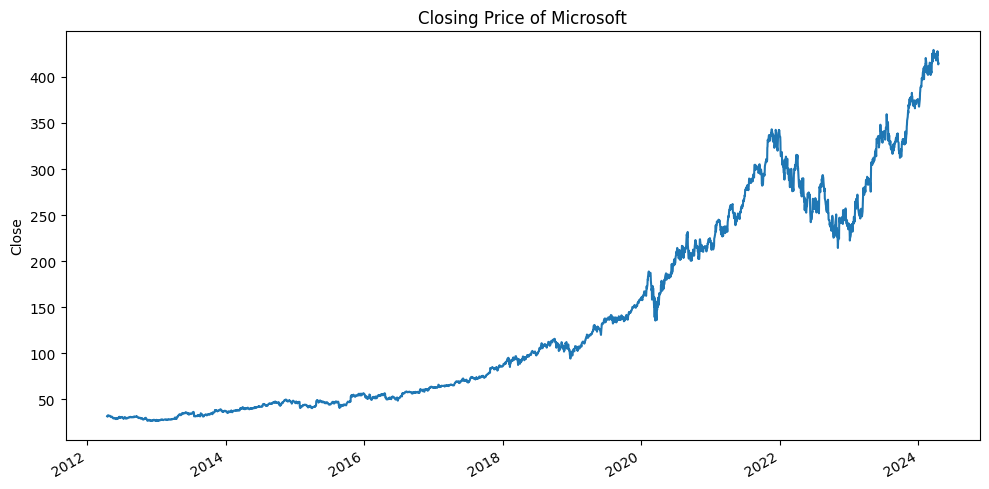

In [13]:
# Let's see a historical view of the closing price
plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1.25, bottom=1.2)

MSFT['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title(f"Closing Price of Microsoft")

plt.tight_layout()

Getting only the close column from the data

In [5]:
data = MSFT.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2869

Normalizing the data

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01258064],
       [0.01183622],
       [0.01151365],
       ...,
       [0.98146402],
       [0.96096779],
       [0.96330023]])

Splitting the data

In [16]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i== 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.01258064, 0.01183622, 0.01151365, 0.0150124 , 0.01426799,
       0.01377171, 0.0144665 , 0.01424318, 0.01392059, 0.01401985,
       0.01399503, 0.01347394, 0.01337469, 0.0114392 , 0.01062034,
       0.01024814, 0.0108933 , 0.01084367, 0.01188585, 0.01069479,
       0.00952853, 0.0087593 , 0.00831265, 0.00719603, 0.00838709,
       0.00841191, 0.00679901, 0.00669975, 0.00667493, 0.00791563,
       0.00736973, 0.00699752, 0.00516129, 0.00540943, 0.00531017,
       0.00739454, 0.00709677, 0.00813895, 0.00627791, 0.00724566,
       0.00684863, 0.00736973, 0.00905707, 0.00861042, 0.01074442,
       0.01131514, 0.00935484, 0.01074442, 0.00868486, 0.00905707,
       0.00942928, 0.00878412, 0.01047146, 0.01039702, 0.0108933 ,
       0.01074442, 0.00947891, 0.00900744, 0.00836228, 0.00727047]), array([0.01183622, 0.01151365, 0.0150124 , 0.01426799, 0.01377171,
       0.0144665 , 0.01424318, 0.01392059, 0.01401985, 0.01399503,
       0.01347394, 0.01337469, 0.0114392 , 0.01062034, 0.01

In [25]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
model.fit(x_train, y_train, batch_size=1, epochs=10, callbacks=[early_stopping])


Epoch 1/10
2809/2809 [==============================] - 36s 8ms/step - loss: 9.0041e-04
Epoch 2/10
2809/2809 [==============================] - 21s 8ms/step - loss: 4.8745e-04
Epoch 3/10
2809/2809 [==============================] - 22s 8ms/step - loss: 2.7746e-04
Epoch 4/10
2809/2809 [==============================] - 23s 8ms/step - loss: 2.1427e-04
Epoch 5/10
2809/2809 [==============================] - 22s 8ms/step - loss: 2.0245e-04
Epoch 6/10
2809/2809 [==============================] - 21s 8ms/step - loss: 2.3369e-04
Epoch 7/10
2809/2809 [==============================] - 22s 8ms/step - loss: 1.5819e-04
Epoch 8/10
2809/2809 [==============================] - 22s 8ms/step - loss: 1.9017e-04
Epoch 9/10
2809/2809 [==============================] - 22s 8ms/step - loss: 1.5785e-04
Epoch 10/10
2809/2809 [==============================] - 23s 8ms/step - loss: 1.5786e-04


In [26]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 5ms/step


5.077626399743747

<ipython-input-27-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


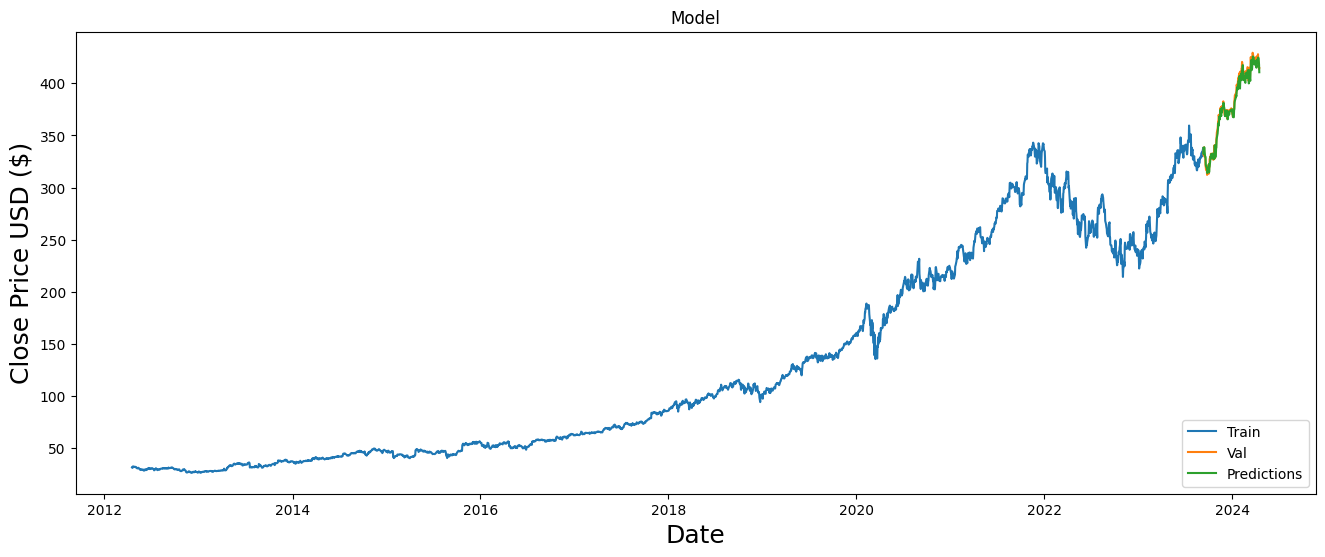

In [27]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
valid

,Close,Predictions
Date,,
2023-09-12,331.769989,337.893799
2023-09-13,336.059998,332.092621
2023-09-14,338.700012,335.906647
2023-09-15,330.220001,338.707001
2023-09-18,329.059998,330.749115
...,...,...
2024-04-10,423.260010,422.953430
2024-04-11,427.929993,419.848419
2024-04-12,421.899994,424.687195
